In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Import data of last 3 years
df17 = pd.read_csv('./developer_survey_2017/survey_results_public.csv')
df18 = pd.read_csv('./developer_survey_2018/survey_results_public.csv')
df19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv')

# Inspect 2017
df17.head()

C:\Users\Kremmydosporos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Inspect 2019 shape
df19.shape

(88883, 85)

In [3]:
# Common columns in 2017, 2018
df17.columns.str.lower().intersection(df18.columns.str.lower())

Index(['respondent', 'country', 'formaleducation', 'companysize',
       'careersatisfaction', 'jobsatisfaction', 'lastnewjob', 'currency',
       'educationtypes', 'selftaughttypes', 'timeafterbootcamp', 'ide',
       'methodology', 'versioncontrol', 'checkincode', 'gender', 'salary'],
      dtype='object')

In [4]:
# Common columns in 2018, 2019
df18.columns.str.lower().intersection(df19.columns.str.lower())

Index(['respondent', 'opensource', 'country', 'student', 'employment',
       'undergradmajor', 'devtype', 'currencysymbol', 'languageworkedwith',
       'languagedesirenextyear', 'databaseworkedwith',
       'databasedesirenextyear', 'platformworkedwith',
       'platformdesirenextyear', 'gender', 'age', 'dependents'],
      dtype='object')

## 1. Professional Coding exp effect on SO visiting frequency

In [7]:
# Inspect value couts of SOVisitFreq
df19["SOVisitFreq"].value_counts()

Daily or almost daily                                 26827
Multiple times per day                                26767
A few times per week                                  19990
A few times per month or weekly                       11162
Less than once per month or monthly                    2957
I have never visited Stack Overflow (before today)      560
Name: SOVisitFreq, dtype: int64

In [8]:
def so_visit_freq_to_numeric(freq):
    '''
    INPUT
    freq - string, values of the SOVisitFreq feature
    
    OUTPUT
    int - An integer according to the frequency, higher integer means higher frequency
    
    This function translates the distinct string values of SOVisitFreq feature into a numeric value in
    such a way that higher frequency have higher values and vice versa
    '''
    if freq == "Multiple times per day":
        return 5
    elif freq == "Daily or almost daily":
        return 4
    elif freq == "A few times per week":
        return 3
    elif freq == "A few times per month or weekly":
        return 2
    elif freq == "Less than once per month or monthly":
        return 1
    else:
        return 0

In [9]:
# transform SOVisitFreq to float
df19['SoVisitFreqNum'] = df19["SOVisitFreq"].apply(so_visit_freq_to_numeric)

In [10]:
# replace string values more than 50 years with 51 and less than 1 year with 0
df19['YearsCodePro'] = df19['YearsCodePro'].replace('More than 50 years', '51')
df19['YearsCodePro'] = df19['YearsCodePro'].replace('Less than 1 year', '0')

In [11]:
# convert feature to float
df19['YearsCodePro'] = (df19['YearsCodePro']).astype(float)

In [12]:
# create statistic
a = df19.groupby(['YearsCodePro']).mean()['SoVisitFreqNum'].sort_index()

Text(0.5, 1.0, 'StackOverflow Visit Frequency')

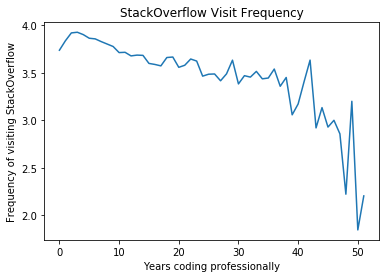

In [13]:
# plot
plt.plot(a)
plt.xlabel("Years coding professionally")
plt.ylabel('Frequency of visiting StackOverflow')
plt.title("StackOverflow Visit Frequency")

## 2. Are people who work remotely more satisfied by their job?

In [15]:
def job_sat_to_numeric(sat):
    '''
    INPUT
    sat - string, values of the JobSat feature
    
    OUTPUT
    int - An integer according to the satisfaction, higher integer means higher satisfaction
    
    This function translates the distinct string values of JobSat feature into a numeric value in
    such a way that higher satisfactions have higher values and vice versa
    '''
    if sat == "Very satisfied":
        return 5
    elif sat == "Slightly satisfied":
        return 4
    elif sat == "Neither satisfied nor dissatisfied":
        return 3
    elif sat == "Slightly dissatisfied":
        return 2
    elif sat == "Very dissatisfied":
        return 1
    else:
        return 0

In [16]:
# Transform JobSat to numeric
df19["JobSat"] = df19["JobSat"].apply(job_sat_to_numeric)

In [17]:
# Calculate jobsatisfaction mean values by workremote
c = df19.groupby(['WorkRemote']).mean()["JobSat"].sort_values()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

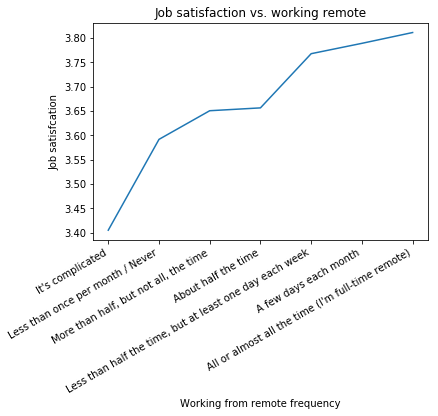

In [18]:
# plot
plt.plot(c)
plt.xlabel("Working from remote frequency")
plt.ylabel('Job satisfcation')
plt.title("Job satisfaction vs. working remote")
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)

## 3. How does the popularity of different programming languages look like over the last three years?

In [19]:
# Inspect feature
df18['LanguageWorkedWith'].head()

0                          JavaScript;Python;HTML;CSS
1                        JavaScript;Python;Bash/Shell
2                                                 NaN
3    C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4                  C;C++;Java;Matlab;R;SQL;Bash/Shell
Name: LanguageWorkedWith, dtype: object

In [20]:
# Inspect feature
# html is combined with css, contrary to the 2018 data
df19['LanguageWorkedWith'].head()

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

In [21]:
def replace_html_css(s):
    '''
    INPUT
    s - String value of language worked with feature
    
    OUTPUT
    s - String with replaced HTML/CSS or nan
    
    This function parses the string provided and replaces all occurences of HTML/CSS
    with HTML;CSS. If the provided string is np.nan then np.nan is returned.
    '''
    try:
        return s.replace('HTML/CSS', 'HTML;CSS')
    except AttributeError:
        return np.NaN

In [22]:
# split html/css
df19['LanguageWorkedWith'] = df19['LanguageWorkedWith'].apply(replace_html_css)

In [23]:
# inspect data
df17['HaveWorkedLanguage'].head()

0                            Swift
1    JavaScript; Python; Ruby; SQL
2                Java; PHP; Python
3           Matlab; Python; R; SQL
4                              NaN
Name: HaveWorkedLanguage, dtype: object

In [24]:
# proportion of nans for feature LanguageWorkedWIth, HaveWorkedLanguage
print(df19['LanguageWorkedWith'].isnull().sum() / df19['LanguageWorkedWith'].shape[0])
print(df18['LanguageWorkedWith'].isnull().sum() / df18['LanguageWorkedWith'].shape[0])
print(df17['HaveWorkedLanguage'].isnull().sum() / df17['HaveWorkedLanguage'].shape[0])

0.014783479405510615
0.20758686965757928
0.2873404420921544


In [25]:
# Parse string values to lists
# Note 2017 has a different delimiter
df19 = df19.assign(**{"LanguageWorkedWithList":df19["LanguageWorkedWith"].str.split(';')})
df18 = df18.assign(**{"LanguageWorkedWithList":df18["LanguageWorkedWith"].str.split(';')})
df17 = df17.assign(**{"HaveWorkedLanguageList":df17["HaveWorkedLanguage"].str.split('; ')})

In [26]:
df19['LanguageWorkedWithList'].head()

0                [HTML, CSS, Java, JavaScript, Python]
1                             [C++, HTML, CSS, Python]
2                                          [HTML, CSS]
3                            [C, C++, C#, Python, SQL]
4    [C++, HTML, CSS, Java, JavaScript, Python, SQL...
Name: LanguageWorkedWithList, dtype: object

In [27]:
df18['LanguageWorkedWithList'].head()

0                      [JavaScript, Python, HTML, CSS]
1                     [JavaScript, Python, Bash/Shell]
2                                                  NaN
3    [C#, JavaScript, SQL, TypeScript, HTML, CSS, B...
4           [C, C++, Java, Matlab, R, SQL, Bash/Shell]
Name: LanguageWorkedWithList, dtype: object

In [28]:
df17['HaveWorkedLanguageList'].head()

0                            [Swift]
1    [JavaScript, Python, Ruby, SQL]
2                [Java, PHP, Python]
3           [Matlab, Python, R, SQL]
4                                NaN
Name: HaveWorkedLanguageList, dtype: object

In [29]:
# no html in 2017 survey
(df17['HaveWorkedLanguage'].str.find('HTML') > -1).sum()

0

In [30]:
# Flatten lists in each row and create Series
df19_langs = df19['LanguageWorkedWithList'].apply(pd.Series).stack().reset_index(drop=True)
df18_langs = df18['LanguageWorkedWithList'].apply(pd.Series).stack().reset_index(drop=True)
df17_langs = df17['HaveWorkedLanguageList'].apply(pd.Series).stack().reset_index(drop=True)

In [31]:
# Calculate the popularity as percentage for each year and store it as a Series object
# The popularity of a language is calcualated as the count of this language in all the answers divided by
# the answers that are not nans.
# Note: in 2017 the feature is called HaveWorkedLanguage
p19 = df19_langs.value_counts() / df19['LanguageWorkedWith'].notnull().sum()
p18 = df18_langs.value_counts() / df18['LanguageWorkedWith'].notnull().sum()
p17 = df17_langs.value_counts() / df17['HaveWorkedLanguage'].notnull().sum()

In [34]:
def plot_lang_popularity(lang):
    '''
    INPUT
    lang - Language of interest as string
    
    OUTPUT
    nothing
    
    This function creates a pandas Series using the popularity calculated in the series p17, p18, p19.
    Visualized the popularity percentage of each year in a bar plot
    '''
    popseries = pd.Series([p17[lang], p18[lang], p19[lang]], index =['2017', '2018', '2019'])
    
    plt.bar(np.arange(popseries.shape[0]), popseries.values, align='center', alpha=0.5)
    plt.xticks(np.arange(popseries.shape[0]), popseries.index)
    plt.ylabel('Popularity')
    plt.title(lang + ' popularity per year')
    plt.show()

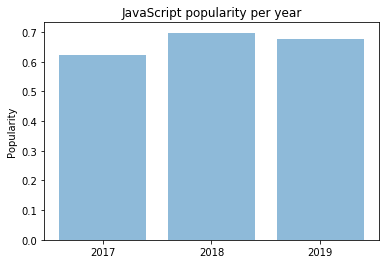

In [35]:
plot_lang_popularity('JavaScript')

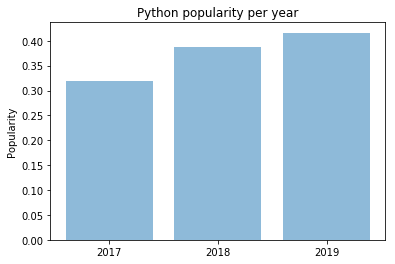

In [36]:
plot_lang_popularity('Python')

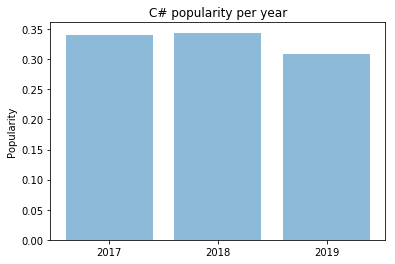

In [37]:
plot_lang_popularity('C#')